In [174]:
import pandas as pd
import numpy as np

from shapely.geometry import Point, shape, mapping
from shapely.ops import unary_union

import matplotlib.pyplot as plt
import seaborn as sns

#from geoband.API import *
import folium
import json
import geopandas as gpd
from geopandas import gpd

from folium import plugins
import re
from pandas import ExcelFile

In [175]:
data = pd.read_csv("/Users/seungji/Desktop/dataanalysis/project/data/finaldata0617.csv",encoding="cp949")

In [176]:
data.columns

Index(['serial', 'lat', 'lon', '초미세먼지(㎍/㎥)', '미세먼지(㎍/㎥)', '기온(℃)', '상대습도( %)',
       '초미세먼지 보정(㎍/㎥)', '미세먼지 보정(㎍/㎥)', 'geometry_x', '버스승차승객수', '버스하차승객수',
       '대여', '반납', 'traffic', 'road', 'subway', 'vent', 'parking', '구동',
       'geometry_y', '통계청행정동코드', '행자부행정동코드', '시군구명', '행정동명', '경도', '위도',
       '총생활인구수', '남10대생활인구수', '여10대생활인구수', '남20대생활인구수', '여20대생활인구수',
       '남30,40대생활인구수', '여30,40대생활인구수', '남50,60대생활인구수', '여50,60대생활인구수',
       '남자70세이상생활인구수', '여자70세이상생활인구수', '자치구', '동', '세대', '인구', '세대당인구',
       '외국인인구비율', '구내전입', '구내전출', '구간전입', '구간전출', '인구밀도', 'park', 'tree',
       'river'],
      dtype='object')

In [177]:
data = data.loc[:,['미세먼지(㎍/㎥)','lat', 'lon','기온(℃)', '상대습도( %)','버스승차승객수', '버스하차승객수','대여', '반납', 'traffic', 'road', 'subway', 'vent', 'parking','남10대생활인구수', '여10대생활인구수', '남20대생활인구수', '여20대생활인구수',
       '남30,40대생활인구수', '여30,40대생활인구수', '남50,60대생활인구수', '여50,60대생활인구수',
       '남자70세이상생활인구수', '여자70세이상생활인구수', '세대', '인구', '세대당인구',
       '외국인인구비율', '구내전입', '구내전출', '구간전입', '구간전출', '인구밀도', 'park', 'tree',
       'river']]

'geometry_x':"geometry",

In [178]:
data = data.rename(columns={'미세먼지(㎍/㎥)':"finedust","기온(℃)":"temp","상대습도( %)":"humid","버스승차승객수": "busin", "버스하차승객수": "busout","대여":"bikerent","반납":"bikereturn",'남10대생활인구수':"m10", '여10대생활인구수':"f10", '남20대생활인구수':"m20", '여20대생활인구수':"f20",'남30,40대생활인구수':"m3040", '여30,40대생활인구수':"f3040", '남50,60대생활인구수':"m5060", '여50,60대생활인구수':"f5060",
       '남자70세이상생활인구수':"m70", '여자70세이상생활인구수':"f70", '세대':"fam", '인구':"pop", '세대당인구':"famperpop",
       '외국인인구비율':"foreign_rt", '구내전입':"gu_in", '구내전출':"gu_out", '구간전입':"gugan_in", '구간전출':"gugan_out", '인구밀도':"pop_dens"})
data = data.dropna()

In [179]:
data["bus"] = (data["busin"]+data["busout"])/2
data["bike"] = (data["bikerent"]+data["bikereturn"])/2
data["trans"] = (data["subway"]+data["parking"])
data["p10"] = data["m10"]+ data["f10"]
data["p20"] = data["m20"]+ data["f20"]
data["p3040"] = data["m3040"]+ data["f3040"]
data["p5060"] = data["m5060"]+ data["f5060"]
data["p70"] = data["m70"]+ data["f70"]

In [180]:
data = data.drop(columns = ['busin', 'busout', 'bikerent', 'bikereturn',"subway","parking",'m10', 'f10', 'm20', 'f20',
       'm3040', 'f3040', 'm5060', 'f5060', 'm70', 'f70'])

In [181]:
data["p20_60"] = data["p20"]+ data["p3040"]+ data["p5060"]

In [182]:
data =data.drop(columns = ["p20","p3040","p5060","fam","gugan_in"])

In [111]:
data.to_csv("/Users/seungji/Desktop/dataanalysis/project/data/data_spatial.csv",encoding = "cp949",index = False)

In [183]:
datas = gpd.GeoDataFrame(data,
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(data.lon, data.lat)])

/Users/seungji/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


datas.to_file("/Users/seungji/Desktop/dataanalysis/project/data/datas06181.geojson", driver="GeoJSON",index=False)

datas.to_file("/Users/seungji/Desktop/dataanalysis/project/data/datas0618.shp")

In [113]:
datas.head()

,finedust,lat,lon,temp,humid,traffic,road,vent,pop,famperpop,...,park,tree,river,bus,bike,trans,p10,p70,p20_60,geometry
0,82.208333,37.494403,126.831472,15.192361,45.857639,622.579456,1528,26,24141.0,2.39,...,2,549,3,40.446350,86.750000,249,2741.313970,2569.435972,16091.832318,POINT (126.83147 37.49440)
1,47.540268,37.509299,126.878380,16.516779,42.315436,1112.406389,6617,56,36132.0,2.68,...,1,347,6,51.694521,411.250000,377,2828.445961,2535.264541,24161.276830,POINT (126.87838 37.50930)
2,42.948052,37.496892,126.843727,14.998052,46.321429,622.579456,2559,33,23434.0,1.90,...,3,373,0,101.409529,366.666667,291,1171.538099,1973.291742,11218.724433,POINT (126.84373 37.49689)
3,46.343972,37.487430,126.838527,14.177305,48.251773,622.579456,1923,27,39209.0,2.48,...,2,320,0,124.349281,243.500000,257,4890.250857,6082.292009,34605.189729,POINT (126.83853 37.48743)
4,77.467811,37.482145,126.889339,15.512446,44.381974,1063.823961,6954,40,13447.0,1.54,...,0,666,0,91.170588,225.500000,319,277.104519,1035.259155,9625.592185,POINT (126.88934 37.48214)


In [184]:
y = datas["finedust"]
X = datas.iloc[:,range(3,24)] 

In [185]:
coords = np.array(list(zip(datas['lat'], datas['lon'])))

In [186]:
from sklearn.model_selection import train_test_split
X_tr, X_tst, y_tr, y_tst = train_test_split(X,y,test_size = 0.2,random_state = 42)
coords_tr, coords_tst = train_test_split(coords,test_size = 0.2,random_state = 42)
print(X_tr.shape,y_tr.shape,X_tst.shape,y_tst.shape)

(844, 21) (844,) (212, 21) (212,)


In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_tr)

X_tr = scaler.transform(X_tr)
X_tst = scaler.transform(X_tst)

In [188]:
pd.DataFrame(X_tr).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

In [189]:
y_tr = np.array(y_tr).reshape((-1,1))

In [190]:
y_tst = np.array(y_tst).reshape((-1,1))

In [191]:
import libpysal as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import compare_surfaces, truncate_colorm

ImportError: cannot import name 'truncate_colorm' from 'mgwr.utils' (/Users/seungji/opt/anaconda3/lib/python3.8/site-packages/mgwr/utils.py)

In [192]:
bw = Sel_BW(coords_tr, y_tr, X_tr, fixed = True, kernel = "Gaussian").search(criterion = 'AIC')
print(bw)

0.11


In [193]:
gwr_model = GWR(coords_tr,y_tr,X_tr,bw = 0.11)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

177078.89020596433


In [194]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 844
Number of covariates:                                                    22

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                         184099.077
Log-likelihood:                                                   -3470.087
AIC:                                                               6984.173
AICc:                                                              6987.519
BIC:                                                             178560.316
R2:                                                                   0.085
Adj. R2:                                                              0.061

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [202]:
X.columns

Index(['temp', 'humid', 'traffic', 'road', 'vent', 'pop', 'famperpop',
       'foreign_rt', 'gu_in', 'gu_out', 'gugan_out', 'pop_dens', 'park',
       'tree', 'river', 'bus', 'bike', 'trans', 'p10', 'p70', 'p20_60'],
      dtype='object')

In [201]:
data.shape

(1056, 25)

In [195]:
y_tr_pred = gwr_model.predict(points = coords_tr, P = X_tr)
y_tr_pred = y_tr_pred.predictions
mean_squared_error(y_tr,y_tr_pred)

209.80911161844108

In [197]:
y_tst_pred = gwr_model.predict(points = coords_tst, P = X_tst)

NotImplementedError: Not available for GWR prediction

In [ ]:
y_tst_pred = y_tst_pred.predictions

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_tst,y_tst_pred)

In [171]:
gwr.sel(finedust ~ temp + humid + traffic + road
+ vent + pop + famperpop + foreign_rt + gu_in + gu_out + gugan_out +
pop_dens + park + tree + river + bus + bike + trans + p10 + p70 +
p20_60,data  = datas, adapt=T)

SyntaxError: invalid syntax (<ipython-input-171-dbd4c79884e8>, line 1)

In [203]:
y = datas["finedust"]
X = datas.iloc[:,range(3,24)] 

In [204]:
coords = np.array(list(zip(datas['lat'], datas['lon'])))

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)

X_tr = scaler.transform(X)
y_tr = np.array(y).reshape((-1,1))

In [207]:
bw = Sel_BW(coords, y_tr, X_tr, fixed = True, kernel = "Gaussian").search(criterion = 'AIC')
print(bw)

0.1


In [215]:
gwr_model = GWR(coords,y_tr,X_tr,bw = 0.1)
gwr_results = gwr_model.fit()
print(gwr_results.resid_ss)

213437.88919827092


In [220]:
X.columns

Index(['temp', 'humid', 'traffic', 'road', 'vent', 'pop', 'famperpop',
       'foreign_rt', 'gu_in', 'gu_out', 'gugan_out', 'pop_dens', 'park',
       'tree', 'river', 'bus', 'bike', 'trans', 'p10', 'p70', 'p20_60'],
      dtype='object')

In [216]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                1056
Number of covariates:                                                    22

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                         219809.353
Log-likelihood:                                                   -4317.007
AIC:                                                               8678.014
AICc:                                                              8681.084
BIC:                                                             212610.393
R2:                                                                   0.092
Adj. R2:                                                              0.074

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [217]:
y_tr_pred = gwr_model.predict(points = coords, P = X_tr)
y_tr_pred = y_tr_pred.predictions
mean_squared_error(y_tr,y_tr_pred)

202.11921325593835

      8 'foreign_rt', 9'gu_in', 10'gu_out', 11'gugan_out', 12'pop_dens', 13'park',
      14 'tree', 15'river', 16'bus', 17'bike', 18'trans', 19'p10', 20'p70', 21'p20_60'

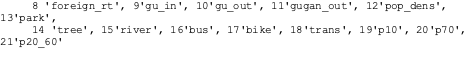